In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns; sns.set()

In [2]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
DATA_DIR = '../Chapter_5_Integration_with_Other_Programming_Languages/files'
DATA_FILE = os.path.join(DATA_DIR, 'all_claims_files.csv')

In [4]:
df = pd.read_csv(DATA_FILE)

In [5]:
df.BENE_BIRTH_DT = pd.to_datetime(df.BENE_BIRTH_DT.astype(str))
df.BENE_DEATH_DT = pd.to_datetime(df.BENE_DEATH_DT.astype(str).str.slice(0, 8))

In [6]:
df['TOTAL_PAID'] = df.MEDREIMB_IP + df.MEDREIMB_OP + df.MEDREIMB_CAR

In [7]:
df = df.loc[df['TOTAL_PAID']>0, :] # Filter to claimants only

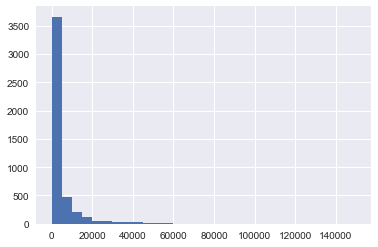

In [8]:
df.TOTAL_PAID.hist(bins=30);

In [9]:
df['TOTAL_LOG_PAID'] = np.log(df['TOTAL_PAID'])

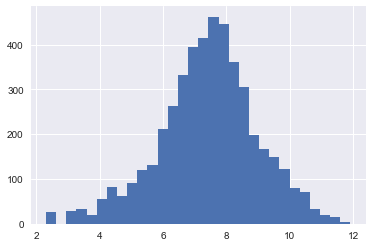

In [11]:
df.TOTAL_LOG_PAID.hist(bins=30);

In [12]:
threshold = df.TOTAL_PAID.quantile(.9)

In [13]:
df['HIGH_COST'] = df.TOTAL_PAID.map(lambda x: 1 if x>=threshold else 0)

In [14]:
gender_ind = pd.get_dummies(df.BENE_SEX_IDENT_CD, drop_first=True, prefix='gender')
df = df.merge(gender_ind, left_index=True, right_index=True)

In [15]:
esrd_ind = pd.get_dummies(df.BENE_ESRD_IND, drop_first=True, prefix='ESRD')
df = df.merge(esrd_ind, left_index=True, right_index=True)

In [16]:
disease_df = df[['SP_ALZHDMTA','SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN','SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']]

In [17]:
code_mapping = {2:0, 1:1}

In [18]:
df[['SP_ALZHDMTA','SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN','SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']] = disease_df.applymap(lambda x: code_mapping[x])

In [19]:
df.to_pickle('claims_df')